# Combine Weather Forecast and Actuals from Weather Map

---


By Mauricio Hernandez

Goal(s):
- Combine weather forecasts and actuals

In [2]:
#Import libraries
import pandas as pd
import os
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from pathlib import Path
import time
from datetime import timezone
from datetime import datetime
from google.colab import drive

In [3]:
#Connect to google drive
drive.mount('/content/gdrive')
#access path where notebook is stored
local_path = "/content/gdrive/MyDrive/Women In Technology/Niharika Yalla/"
#local_path = "/content/gdrive/MyDrive/Lumiere Program/Niharika Yalla/Code/"
#Change the working directory to the folder
os.chdir(local_path)

Mounted at /content/gdrive


In [4]:
project_path = Path(local_path).absolute()

input_data_path = project_path.joinpath('Data', 'Inputs')
output_data_path = project_path.joinpath('Data', 'Outputs')
print(input_data_path)

/content/gdrive/MyDrive/Women In Technology/Niharika Yalla/Data/Inputs


In [5]:
actuals_filename = 'weather_actuals_multicities.csv'
forecasts_filename = 'weather_forecast_multicities.csv'

#reading actuals and forecasts of all cities
df_forecasts = pd.read_csv(output_data_path.joinpath(forecasts_filename), parse_dates=['dt', 'dt_forecast_made'], index_col=0)
df_actuals = pd.read_csv(output_data_path.joinpath(actuals_filename), parse_dates=['dt'], index_col=0)
df_actuals.head()

,dt,city,timezone,timezone_offset,sunrise,sunset,temp,feels_like,pressure,humidity,dew_point,clouds,visibility,wind_speed,wind_deg,weather,wind_gust,rain.1h,rain.3h,uvi
0,2023-10-15 00:00:00,Sacramento,America/Los_Angeles,-25200,2023-10-14 14:13:46,2023-10-15 01:29:54,298.82,298.41,1019,37,283.06,0,10000.0,3.09,30,"[{'id': 800, 'main': 'Clear', 'description': '...",NaN,NaN,NaN,NaN
1,2023-10-15 01:00:00,Sacramento,America/Los_Angeles,-25200,2023-10-14 14:13:46,2023-10-15 01:29:54,297.46,297.02,1019,41,283.38,0,10000.0,3.09,10,"[{'id': 800, 'main': 'Clear', 'description': '...",NaN,NaN,NaN,NaN
2,2023-10-15 02:00:00,Sacramento,America/Los_Angeles,-25200,2023-10-14 14:13:46,2023-10-15 01:29:54,295.71,295.27,1019,48,284.16,0,10000.0,3.09,320,"[{'id': 800, 'main': 'Clear', 'description': '...",NaN,NaN,NaN,NaN
3,2023-10-15 03:00:00,Sacramento,America/Los_Angeles,-25200,2023-10-14 14:13:46,2023-10-15 01:29:54,294.18,293.80,1020,56,285.08,0,10000.0,2.57,210,"[{'id': 800, 'main': 'Clear', 'description': '...",NaN,NaN,NaN,NaN
4,2023-10-15 04:00:00,Sacramento,America/Los_Angeles,-25200,2023-10-14 14:13:46,2023-10-15 01:29:54,292.77,292.46,1020,64,285.78,0,10000.0,1.54,290,"[{'id': 800, 'main': 'Clear', 'description': '...",NaN,NaN,NaN,NaN


In [6]:
df_forecasts['city'] = df_forecasts['city'].str.title()

df_forecasts.city.unique()

array(['Los Angeles', 'Sacramento', 'San Francisco', 'San Diego'],
      dtype=object)

In [7]:
df_actuals.city.unique()

array(['Sacramento', 'San Diego', 'Los Angeles', 'San Francisco'],
      dtype=object)

In [8]:
# Remove duplicate values
df_actuals.drop_duplicates(subset=['dt', 'city'], keep='last', inplace = True)
df_forecasts.drop_duplicates(subset=['dt', 'city'], keep='last', inplace = True)

In [9]:
df_forecasts.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2771 entries, 672 to 959
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   dt                2771 non-null   datetime64[ns]
 1   dt_machine        2771 non-null   int64         
 2   dt_hours_diff     2771 non-null   int64         
 3   dt_forecast_made  2771 non-null   datetime64[ns]
 4   city              2771 non-null   object        
 5   timezone          2771 non-null   object        
 6   timezone_offset   2771 non-null   int64         
 7   temp              2771 non-null   float64       
 8   feels_like        2771 non-null   float64       
 9   pressure          2771 non-null   int64         
 10  humidity          2771 non-null   int64         
 11  dew_point         2771 non-null   float64       
 12  uvi               2771 non-null   float64       
 13  clouds            2771 non-null   int64         
 14  visibility        2771 

In [10]:
df_actuals.info()
# Keeping only the columns that will be used
forecast_columns_list = ['dt', 'dt_forecast_made', 'dt_hours_diff', 'city', 'temp', 'humidity', 'clouds', 'visibility']
actuals_columns_list = ['dt', 'city', 'temp', 'humidity', 'clouds', 'visibility']

df_actuals_sub = df_actuals[actuals_columns_list].copy()
df_forecasts_sub = df_forecasts[forecast_columns_list].copy()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2592 entries, 0 to 23
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   dt               2592 non-null   datetime64[ns]
 1   city             2592 non-null   object        
 2   timezone         2592 non-null   object        
 3   timezone_offset  2592 non-null   int64         
 4   sunrise          2592 non-null   object        
 5   sunset           2592 non-null   object        
 6   temp             2592 non-null   float64       
 7   feels_like       2592 non-null   float64       
 8   pressure         2592 non-null   int64         
 9   humidity         2592 non-null   int64         
 10  dew_point        2592 non-null   float64       
 11  clouds           2592 non-null   int64         
 12  visibility       1815 non-null   float64       
 13  wind_speed       2592 non-null   float64       
 14  wind_deg         2592 non-null   int64    

In [11]:
# COmbining both files (actuals and forecast) based on datetime and city name
df_actuals_forec = df_actuals_sub.merge(df_forecasts_sub, on=['dt','city'], suffixes=('_actual', '_forec'))
df_actuals_forec.sort_values(by=['city','dt'], ascending=True, inplace = True)

In [12]:
df_actuals_forec.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1367 entries, 683 to 1366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   dt                 1367 non-null   datetime64[ns]
 1   city               1367 non-null   object        
 2   temp_actual        1367 non-null   float64       
 3   humidity_actual    1367 non-null   int64         
 4   clouds_actual      1367 non-null   int64         
 5   visibility_actual  902 non-null    float64       
 6   dt_forecast_made   1367 non-null   datetime64[ns]
 7   dt_hours_diff      1367 non-null   int64         
 8   temp_forec         1367 non-null   float64       
 9   humidity_forec     1367 non-null   int64         
 10  clouds_forec       1367 non-null   int64         
 11  visibility_forec   1367 non-null   int64         
dtypes: datetime64[ns](2), float64(3), int64(6), object(1)
memory usage: 138.8+ KB


Text(0, 0.5, 'Temperature in Celsius')

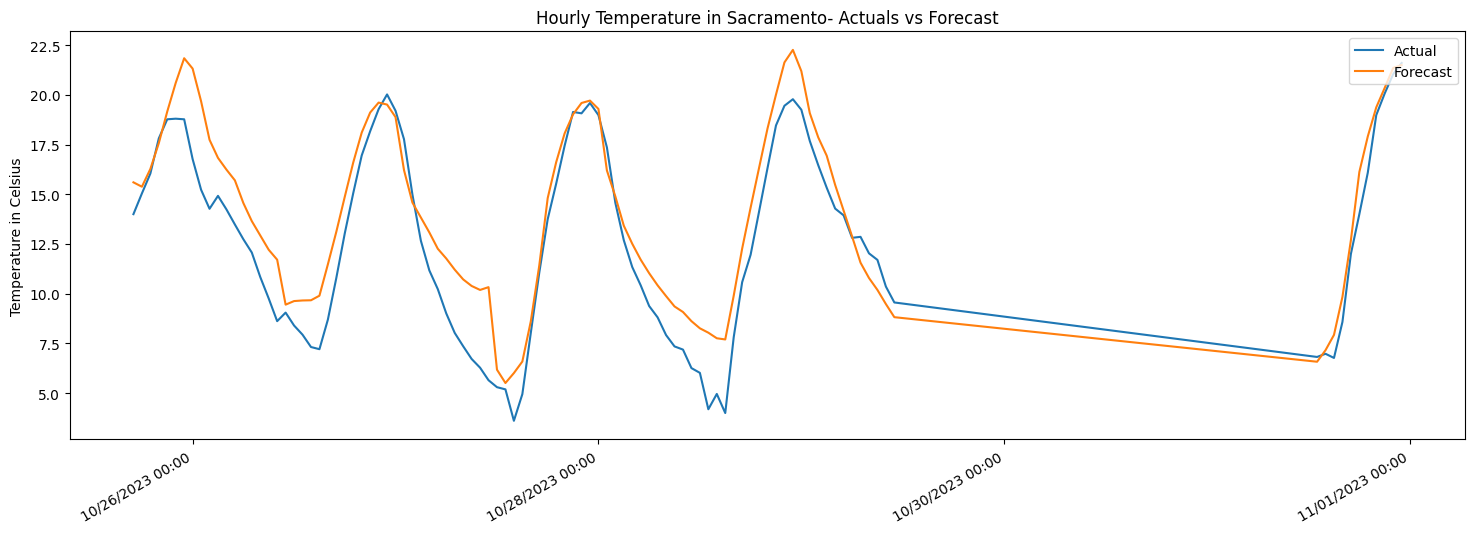

In [13]:
#Ploting forecast and actual temperature for San Diego (as an example)
city_name = 'Sacramento'
mask_city = df_actuals_forec['city'] == city_name

plt.figure(figsize=(18,6))

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%d/%Y %H:%M'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval = 2))

plt.plot(df_actuals_forec[mask_city].dt, df_actuals_forec[mask_city].temp_actual - 273.15, label="Actual")
plt.plot(df_actuals_forec[mask_city].dt, df_actuals_forec[mask_city].temp_forec - 273.15, label="Forecast")

plt.legend(loc="upper right")
plt.gcf().autofmt_xdate()

plt.title("Hourly Temperature in {}- Actuals vs Forecast".format(city_name))
plt.ylabel("Temperature in Celsius")

Text(0, 0.5, 'Temperature Difference')

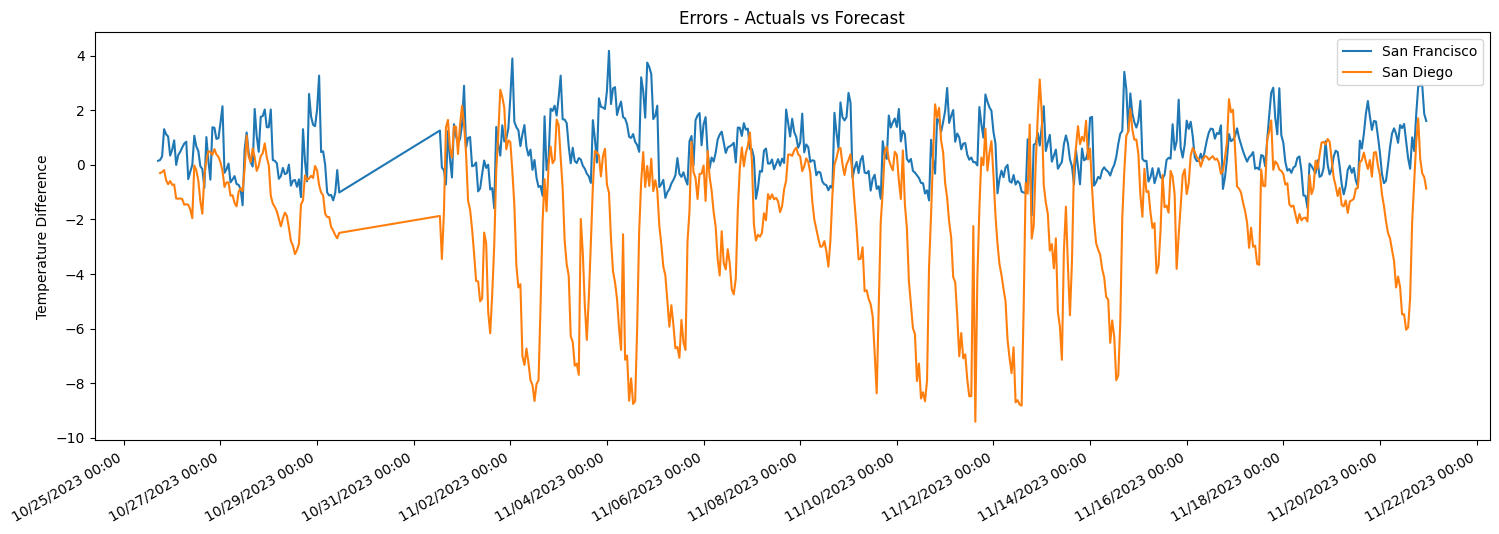

In [14]:
#Calculating errors Actuals and Forecasting

df_actuals_forec['error']= df_actuals_forec.temp_actual - df_actuals_forec.temp_forec

plt.figure(figsize=(18, 6))

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%d/%Y %H:%M'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval = 2))

city_name = 'San Francisco'
mask_city = df_actuals_forec['city'] == city_name
plt.plot(df_actuals_forec[mask_city].dt, df_actuals_forec[mask_city].error, label="San Francisco")
city_name = 'San Diego'
mask_city = df_actuals_forec['city'] == city_name
plt.plot(df_actuals_forec[mask_city].dt, df_actuals_forec[mask_city].error, label="San Diego")


plt.legend(loc="upper right")
plt.gcf().autofmt_xdate()

plt.title("Errors - Actuals vs Forecast")
plt.ylabel("Temperature Difference")

In [15]:
# save file in outputs folder
out_filename = 'weather_forec_and_actuals.csv'
out_filepath_name = output_data_path.joinpath(out_filename)

df_actuals_forec.to_csv(out_filepath_name)